# Derivas de concepto en la cadena de bloques. Método ADWIN

Detección de derivas de concepto en el número de transacciones de la cadena de bloques, a partir del método matemático ADWIN, con salida gráfica.

In [1]:
!pip install river

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from btc_connect import btc_connect
from river import drift
import datetime, matplotlib.pyplot as plt

In [3]:
# Conección al nodo local
rpc_connection = btc_connect()

In [4]:
# Intervalo de bloques
start = 367000 # Inicio: 0 
end = 367999 # Para último bloque de la cadena: rpc_connection.getblockcount() 

In [5]:
# Adaptación de función para graficar el total de transacciones por bloque y las derivas de concepto detectadas
# https://riverml.xyz/latest/introduction/getting-started/concept-drift-detection/
def plot_transaction(x, y, xlabel, drift=None):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(x, y, label="transacciones")
    ax.set_ylim(bottom=0)
    ax.set_title("Número de transacciones por bloque")
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Transacciones")
    if drift is not None:
        legend=0
        for drift_detected in drift:
            if legend==0:
                ax.axvline(drift_detected, color="red", linestyle=":", label="derivas de concepto")
                legend=1
            else:
                ax.axvline(drift_detected, color="red", linestyle=":")
    fig.legend(loc="outside upper left")
    plt.show()

In [6]:
block_number = []
transactions = []

# ADWIN Valores por defecto:
# https://riverml.xyz/dev/api/drift/ADWIN/
# delta=0.002         -> Valor de significancia 
# clock=32            -> Frecuencia con la que se comprueban cambios. 1 => con cada nuevo dato
# max_buckets=5       -> Cantidad máxima de contenedores de datos de cada tamaño que se debe mantener, como paso previo a ser fusionados
# min_window_length=5 -> Longitud mínima que debe tener una subventana para ser evaluada 
# grace_period=10     -> Cantidad mínima de datos exigida para realizar la detección de cambios

drift_detector = drift.ADWIN(delta=0.2, clock=1, min_window_length=4)

block_drift = []  # Bloques en los que se detecta una deriva de concepto
block_transactions_drift = []  # Total de transacciones de dichos bloques
block_datetime_drift = []  # Marca temporal de los bloques

for i in range (start, end + 1):
    blockhash = rpc_connection.getblockhash(i)  # Obtiene el hash del bloque
    block = rpc_connection.getblock(blockhash)  # Obtiene el bloque
    block_number.append(i)
    transactions.append(block["nTx"])  # Número de transacciones del bloque

    drift_detector.update(block["nTx"])
    if drift_detector.drift_detected:  # Deriva de concepto detectada
        block_drift.append(i)
        block_transactions_drift.append(block["nTx"])
        block_datetime_drift.append(datetime.datetime.fromtimestamp(block["time"]))

xlabel = f"Bloques: {start} a {end}"

### Derivas de concepto detectadas

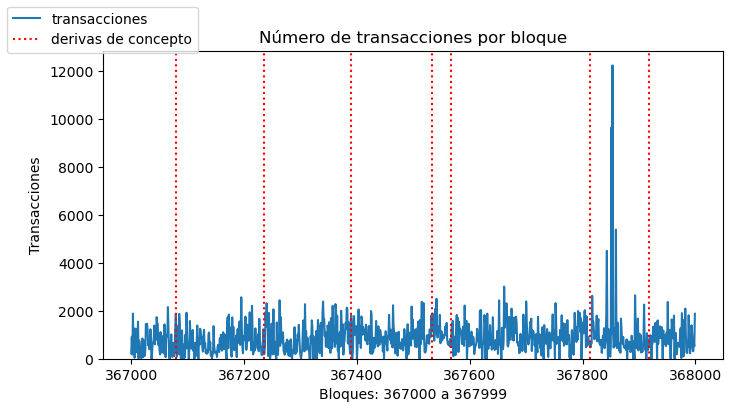

In [7]:
plot_transaction(block_number, transactions, xlabel, block_drift)

### Bloque de comienzo, número de transacciones y marca temporal de minado

In [8]:
for x, y, z in (zip(block_drift, block_transactions_drift, block_datetime_drift)):
    print(f"Bloque {x}: {y} transacciones - {z.strftime('%d/%m/%Y %H:%M:%S')}")

Bloque 367079: 1870 transacciones - 26/07/2015 19:48:52
Bloque 367235: 181 transacciones - 27/07/2015 19:54:55
Bloque 367390: 1813 transacciones - 28/07/2015 23:14:24
Bloque 367533: 1161 transacciones - 29/07/2015 20:32:49
Bloque 367567: 588 transacciones - 30/07/2015 02:16:26
Bloque 367814: 473 transacciones - 31/07/2015 20:58:51
Bloque 367917: 585 transacciones - 01/08/2015 11:58:35
